# Project: Investigate a Dataset - Brazilian Doctor Appointment Analysis
## Christopher Bond

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


# Introduction

### Dataset Description  

The followng analysis explores Brazilian health data on 110K+ patients along with demographic information and whether or not they showed up for scheduled medical appointments. Reducing medical no-shows can ensure patients receive the medical care they need, and also reduces medical resource and financial waste.

#### The following variables were found in the dataset:

* PatientId: Identification of a patient

* AppointmentID: Identification of each appointment

* Gender: Male or Female

* DataMarcacaoConsulta: The day of the actual appointment.

* DataAgendamento: The day someone called or registered the appointment.

* Age: Age of patient

* Neighbourhood: Where the appointment takes place.

* Scholarship: Yes or no

* Hipertension: Yes or no

* Diabetes: Yes or no

* Alcoholism: Yes or no

* Handicap: Yes or no

* SMS_received: 1 or more messages sent to the patient.

* No-show: Yes or no


### Question(s) for Analysis

#### The feature of interest for this analysis will be patient no-shows. The specific questions of interest are as follows:

* Are differences seen in the no-show percentages between genders?
* This dataset contains three months of data, are differences seen in the number of no-shows for any of these three months?
* Are differences seen in the no-show percentages between various age cohorts?
* Are there differences between gender no-shows in individuals who have a chronic health condition. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

### Data Wrangling and Prelimiary Exploration

#### Issues observed:

* There are mispelled feature names (Hipertension and Handicap)
* PatientID needs to be formatted to a string.
* ScheduledDay and AppointmentDay day needs to be formatted to datetime

In [2]:
#Importation of csv file and preliminary exploration via .head()
data = pd.read_csv("/Users/christopherbond/Desktop/Udacity Initial Course Project/KaggleV2-May-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Dataframe has 110527 rows and 14 features/columns

In [3]:
# Dataframe exploration via .shape
data.shape

(110527, 14)

#### Information below shows no missing data. 

In [4]:
# Used .info() to determine dtype and mnumber of ising null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Exploration of values for each column.

* Age: There is a -1 value and also wish to look at 115. That is a very old individual but not impossible.
* Handicap: Should be true false or 0 or 1...the higher numbers appear incorrect.

In [5]:
# Columns to explore values.
columns = ['Gender',
        'Age',
        'Scholarship',
        'Hipertension',
        'Diabetes',
        'Alcoholism',
        'Handcap',
        'SMS_received',
        'No-show']

In [6]:
# Function to print distinct values.
def unique():
    for col in columns:
        print(data[col].unique())

unique()

['F' 'M']
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


## Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### Generate copy of dataframe for cleaning

In [7]:
data_clean = data.copy()

#### Convert PatientID feature to string object

In [8]:
# Convert float to string
data_clean["PatientId"] = data_clean["PatientId"].astype(str)

# Drop the decimal and trailing 0
data_clean["PatientId"] = data_clean["PatientId"].str[:-2]

# Confirm changes
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Converted ScheduledDay and AppointmentDay into Datetime Objects and Feature Engineered a string (AppointmentDate and ScheduledDate for each.

In [9]:
# Convert each column to datetime object
data_clean["ScheduledDay"] = pd.to_datetime(data_clean["ScheduledDay"])
data_clean["AppointmentDay"] = pd.to_datetime(data_clean["AppointmentDay"])

# Create new feature with date only as a string.
data_clean["Scheduled_Date"] = data_clean["ScheduledDay"].dt.date
data_clean["Appointment_Date"] = data_clean["AppointmentDay"].dt.date

# Confirm changes
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Appointment_Date
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


#### Change misspelled varibale names

In [10]:
# Used .rename to change names
data_clean = data_clean.rename(columns={"Neighbourhood": "Neighborhood", "Hipertension": "Hypertension", "Handcap": "Handicap"})

# Confirm changes
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Date,Appointment_Date
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


#### Delete record where age = -1.

In [11]:
# Obtain index of row
idx = data_clean[data_clean["Age"] < 0].index

# Drop the row
data_clean = data_clean.drop(idx)

# Filter to confirm removal
data_clean[data_clean["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Date,Appointment_Date


#### Explore ages above 100...I see no reason to doubt these ages. 

In [12]:
age = data_clean[data_clean["Age"] >= 100]
age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Date,Appointment_Date
58014,976294799775439,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No,2016-05-03,2016-05-03
63912,31963211613981,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2016-05-16,2016-05-19
63915,31963211613981,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2016-05-16,2016-05-19
68127,31963211613981,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2016-04-08,2016-05-16
76284,31963211613981,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,2016-05-30,2016-05-30
79270,9739429797896,5747809,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,0,0,0,0,1,0,No,2016-05-30,2016-05-31
79272,9739429797896,5747808,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,0,0,0,0,1,0,No,2016-05-30,2016-05-31
90372,234283596548,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No,2016-05-31,2016-06-02
92084,55783129426615,5670914,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No,2016-05-06,2016-06-03
97666,748234579244724,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,2016-05-19,2016-06-03


#### Explore handicap column for values greater than 1

In [13]:
handicap = data_clean[data_clean["Handicap"] >1]
handicap

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Date,Appointment_Date
946,72825819926211,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,No,2016-04-14,2016-04-29
1665,12429193284112,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,No,2016-03-30,2016-04-29
1666,12429193284112,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No,2016-03-30,2016-04-29
2071,12429193284112,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No,2016-04-29,2016-04-29
2091,14918292313383,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,No,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,238721151823643,5756931,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,No,2016-06-01,2016-06-07
109484,358949459162675,5752442,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,No,2016-05-31,2016-06-02
109733,566297621534644,5772744,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,No,2016-06-03,2016-06-07
109975,45221851115953,5766970,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,No,2016-06-02,2016-06-06


#### Handicap should be a boolean feature. Obviously a coding error occurred. The column will be dropped. 

In [14]:
# Used .drop() to delete column
data_clean = data_clean.drop("Handicap", axis = 1)

# Confirm changes
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show,Scheduled_Date,Appointment_Date
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No,2016-04-29,2016-04-29


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Do differences exist in no-show percentages between genders?

#### Generated a no-show dataframe for those indicating a no-show appointment

In [15]:
# Generated a filtered no-show = "yes dataframe
no_show = data_clean[data_clean["No-show"] == "Yes"]

#### Values counts of genders for entire cleaned dataframe.

In [16]:
# Used .value_counts and indexed for values of interest.
num_females = data_clean["Gender"].value_counts()[0]
num_males = data_clean["Gender"].value_counts()[1]

#### Values counts of genders for no_show dataframe.

In [17]:
# Used .value_counts and indexed for values of interest on no_show dataframe.
no_show_females = no_show["Gender"].value_counts()[0]
no_show_males = no_show["Gender"].value_counts()[1]

#### Generation of no_show percents by gender.

In [18]:
# Divded two variables of interest and rounded to 2 decimal places.
percent_females = round(((no_show_females/num_females)*100),2)
percent_males = round(((no_show_males/num_males)*100),2)

#### Generation of pieplot

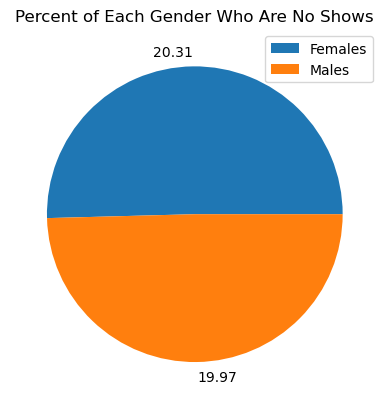

In [19]:
# Data to be plotted
data =[percent_females,percent_males]

# xtick labels
labels =["Females","Males"]

# Pie plot generation
ax = plt.pie(data, labels = data)
plt.title("Percent of Each Gender Who Are No Shows")
plt.legend(labels);

### Observation: The difference in gender no-shows is minimal. 

### Research Question 2: Do differences exist in no-show percentages by month?

#### Generation of month column and groupby object with coount aggregation.

In [20]:
# Generation of month column
no_show['month'] = no_show['AppointmentDay'].dt.month

# Group by month, do not have group as index, count aggregate
month_group = no_show.groupby("month",as_index=False).count()

# Index groupby object for "month","No-show" columns 
month_group = month_group[["month","No-show"]]

# Confirmation
month_group

,month,No-show
0,4,633
1,5,16804
2,6,4882


#### Generation of barplot

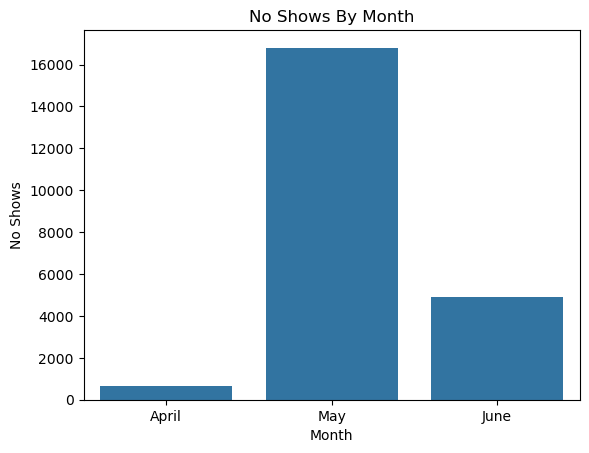

In [21]:
# Labels
labels =["April","May","June"]

# Generate barplot
ax1 = sns.barplot(data = month_group, x = "month", y = "No-show")

# Set custom xtick labels
ax1.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("No Shows")
plt.title("No Shows By Month");

### Observation: Large spike in May no-shows.

### Research Question 3: Do differences exist in no-show percentages between age cohorts?

#### Generation of Age Cohort Category 

In [22]:
# Variables
a = data_clean
b = no_show 
c = 'Age_cats'
d = "Age"

# Create bins of age cohorts
e = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Labels for bins
f = ["0-10", "11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","101-110", "111+"]

# Generate bin function
def bins(e,f,a,b,c,d):
    a[c] = pd.cut(a[d], bins = e, labels = f)
    b[c] = pd.cut(b[d], bins = e, labels = f)
    
bins(e,f,a,b,c,d)

# Confirm new variable created.
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show,Scheduled_Date,Appointment_Date,month,Age_cats
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,Yes,2016-04-27,2016-04-29,4,21-30
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,Yes,2016-04-27,2016-04-29,4,31-40
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,1,Yes,2016-04-26,2016-04-29,4,21-30
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,Yes,2016-04-28,2016-04-29,4,31-40
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,Yes,2016-04-27,2016-04-29,4,21-30


#### Age cohort counts

In [23]:
# Value counts of all patients and only no shows.
age_counts = data_clean["Age_cats"].value_counts()
no_show_age_counts = no_show["Age_cats"].value_counts()

In [24]:
# Generate list of age cohort categories
age_list = ['0-10',
            '11-20',
            '21-30',
            '31-40',
            '41-50',
            '51-60',
            '61-70',
            '71-80',
            '81-90',
            '91-100',
            '101-110',              
            '111+']

#### Generate dataframe of percent of no shows by age cohort

In [25]:
# Generate dataframe
age_df = pd.DataFrame({"Ages": age_list, "No-Shows Count" : no_show_age_counts, "Total Count":age_counts})

# Create percent feature
age_df["Percents"] = round(((age_df["No-Shows Count"]/age_df["Total Count"])*100),2)

#### Plot age cohort line plot. (Would have likely used barplot but wanted to include a variety of plots.)

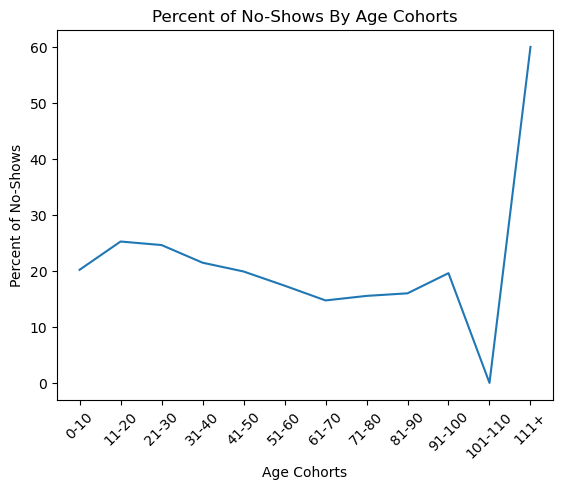

In [26]:
# Generate lineplot 
sns.lineplot(data = age_df, x = "Ages", y = "Percents")
plt.xticks(rotation = 45)
plt.xlabel("Age Cohorts")
plt.title("Percent of No-Shows By Age Cohorts")
plt.ylabel("Percent of No-Shows");

#### Observation: 11-20 cohort is highest followed by a gradual decrease until a slight increase 61 and onward. The variability at very high age cohorts could be due to small sample size. 

### Research Question 4: Do differences exist in no-show percentages between genders for those with a chronic condition?

#### Created chronic condition column where if any of three columns were a yes person had a chronic illness and was labelled appropriately.

In [27]:
# Generated chronic illness column from no-show dataframe and formatted via np.where
no_show["Chronic Illness"] = np.where(((no_show["Hypertension"] + no_show["Diabetes"] + no_show["Alcoholism"])>0),'yes', 'no')
no_show.head()   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show,Scheduled_Date,Appointment_Date,month,Age_cats,Chronic Illness
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,Yes,2016-04-27,2016-04-29,4,21-30,no
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,Yes,2016-04-27,2016-04-29,4,31-40,no
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,1,Yes,2016-04-26,2016-04-29,4,21-30,no
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,Yes,2016-04-28,2016-04-29,4,31-40,no
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,Yes,2016-04-27,2016-04-29,4,21-30,no


#### Generated chronic illness dataframe of no shows.

In [28]:
# Filtered no show dataframe for those with chronic illness 
no_show_chronic = no_show[no_show["Chronic Illness"] == "yes"]

# Showed filter correct
no_show_chronic.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show,Scheduled_Date,Appointment_Date,month,Age_cats,Chronic Illness
44,274164858852,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,Yes,2016-04-28,2016-04-29,4,71-80,yes
126,944758151797235,5633576,F,2016-04-28 09:37:22+00:00,2016-04-29 00:00:00+00:00,67,PRAIA DO SUÁ,0,0,1,0,0,Yes,2016-04-28,2016-04-29,4,61-70,yes
131,47559375448498,5637150,M,2016-04-28 17:38:06+00:00,2016-04-29 00:00:00+00:00,29,PRAIA DO SUÁ,0,0,0,1,0,Yes,2016-04-28,2016-04-29,4,21-30,yes
212,426698361512188,5642059,M,2016-04-29 14:59:38+00:00,2016-04-29 00:00:00+00:00,62,SANTOS DUMONT,0,1,1,0,0,Yes,2016-04-29,2016-04-29,4,61-70,yes
270,8617227766652,5620528,F,2016-04-26 09:08:53+00:00,2016-04-29 00:00:00+00:00,45,CARATOÍRA,1,1,0,0,1,Yes,2016-04-26,2016-04-29,4,41-50,yes


#### Value count generation by gender

In [29]:
# Generated values counts by gender for all patients and then those who (were no shows and had a chronic illness).
chronic_females = no_show_chronic["Gender"].value_counts()[0]
chronic_males = no_show_chronic["Gender"].value_counts()[1]
num_females = data_clean["Gender"].value_counts()[0]
num_males = data_clean["Gender"].value_counts()[1]

#### Created percentages by gender

In [30]:
# Calculated percents and generated data to be plotted.
no_show_chronic_female = round(((chronic_females/num_females)*100),2)
no_show_chronic_male = round(((chronic_males/num_males)*100),2)
data = [no_show_chronic_female,no_show_chronic_male]

#### Barplot generation

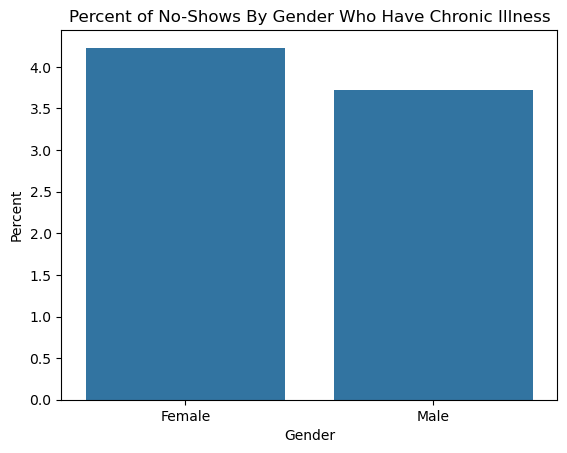

In [31]:
#xtick labels
labels = ["Female","Male"]

#Barplot
ax4 = sns.barplot(data = data)

#Set xtick labels
ax4.set_xticklabels(labels)
plt.ylabel("Percent")
plt.xlabel("Gender")
plt.title("Percent of No-Shows By Gender Who Have Chronic Illness");

### Observation: There appears to be a slight increase in no-shows for females with a chronic condition. 

<a id='conclusions'></a>
## Conclusions

### Findings Summary: 

* Little to no difference exists between males and females as to whether or not they'll make their appointment. Around 20% of each gender misses appointments. Perhaps looking at gender in different neighborhoods or individually while exploring the age cohorts may result in greater differences.  

* There is a marked increase in the number of no-shows in May. If further data continues to support this observation, further investigation may be needed to determine the reasoning as to why and also to develop strategies to minimize such levels of no-shows. 

* Our age cohort analysis showed fluctuations between 20-25%. The highest percentage of around 25% occurred in lower age groups and then slowly decreased until 90+ when large variations occurred. I suspect this may be simply due to a small sample size. While I did not do so in this study, perhaps analyzing the age cohorts when individuals possess a chronic conditions is an additional area to explore.  

* Looking at differences in no-shows between genders when individuals have a chronic condition, a slight increase in female no-shows was observed. It was only around a .75% difference though. I would perhaps explore gender and chronically ill individuals 

### Limitations

* The data only had three months of data. I would be interested in exploring larger time points to determine if seasonal differences exist as we saw for May.

* I would like to break down the categorical chronic illnesses into degrees of severity. Is individual slightly hypertensive? How many drinks do they consumer per week versus yes or no for alcoholism? This may allow for more robust correlation to be explored.

* I would also like to explore income levels, educational levels, etc.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [32]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 791904 bytes to Investigate_a_Dataset.html
